In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata,make_circles
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#https://datos.gob.mx/busca/dataset/pacientes-en-espera-de-un-organo-o-tejido-al-31-de-diciembre-de-2019
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\Pacientes_en_esperab.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
data=df.copy()
data.head()

,SEXO,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,ESTADO_DE_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,ESTADO_DE_RESIDENCIA_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
0,FEMENINO,2,O,POSITIVO,1946-09-07,2002-02-12,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99
1,MASCULINO,1,O,POSITIVO,1984-11-15,2002-02-12,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99
2,FEMENINO,2,O,NEGATIVO,2002-01-01,2002-02-25,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99
3,FEMENINO,2,O,POSITIVO,2002-02-01,2002-03-27,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99
4,FEMENINO,2,O,NEGATIVO,2002-05-01,2002-05-05,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99


In [3]:
data = data.drop(['SEXO'], axis=1)
data = data.drop(['ENTIDAD_FEDERATIVA_ESTABLECIMIENTO'], axis=1)
data = data.drop(['ESTADO_DE_ORIGEN_PACIENTE'], axis=1)
data = data.drop(['ESTADO_DE_RESIDENCIA_PACIENTE'], axis=1)
le = LabelEncoder() 
data['RH']= le.fit_transform(data['RH'])
#daf['ORGANO']= le.fit_transform(daf['ORGANO'])
data['ESTABLECIMIENTO']= le.fit_transform(data['ESTABLECIMIENTO'])
data['INSTITUCION']= le.fit_transform(data['INSTITUCION'])
data['GRUPO_SANGUINEO']= le.fit_transform(data['GRUPO_SANGUINEO'])
data['ORIGEN_INJERTO']= le.fit_transform(data['ORIGEN_INJERTO'])
data.head()

,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
0,2,9,4,1946-09-07,2002-02-12,RIÑÓN,0,266,0,14,99,99
1,1,9,4,1984-11-15,2002-02-12,RIÑÓN,0,266,0,14,99,99
2,2,9,1,2002-01-01,2002-02-25,RIÑÓN,0,266,0,14,99,99
3,2,9,4,2002-02-01,2002-03-27,RIÑÓN,0,266,0,14,99,99
4,2,9,1,2002-05-01,2002-05-05,RIÑÓN,0,266,0,14,99,99


In [11]:
data['FECHA_NACIMIENTO'] = pd.to_datetime(data['FECHA_NACIMIENTO'], format='%Y-%m-%d')
data['year'] = data['FECHA_NACIMIENTO'].dt.year
data['month'] = data['FECHA_NACIMIENTO'].dt.month
data['weekday'] = data['FECHA_NACIMIENTO'].dt.weekday
data['FECHA_REGISTRO_COMITE'] = pd.to_datetime(data['FECHA_REGISTRO_COMITE'], format='%Y-%m-%d')
data['yearR'] = data['FECHA_REGISTRO_COMITE'].dt.year
data['monthR'] = data['FECHA_REGISTRO_COMITE'].dt.month
data['weekdayR'] = data['FECHA_REGISTRO_COMITE'].dt.weekday
data.head()

,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE,year,month,weekday,yearR,monthR,weekdayR
0,2,9,4,1946-09-07,2002-02-12,RIÑÓN,0,266,0,14,99,99,1946,9,5,2002,2,1
1,1,9,4,1984-11-15,2002-02-12,RIÑÓN,0,266,0,14,99,99,1984,11,3,2002,2,1
2,2,9,1,2002-01-01,2002-02-25,RIÑÓN,0,266,0,14,99,99,2002,1,1,2002,2,0
3,2,9,4,2002-02-01,2002-03-27,RIÑÓN,0,266,0,14,99,99,2002,2,4,2002,3,2
4,2,9,1,2002-05-01,2002-05-05,RIÑÓN,0,266,0,14,99,99,2002,5,2,2002,5,6


In [12]:
data = data.drop(['FECHA_NACIMIENTO'], axis=1)
data = data.drop(['FECHA_REGISTRO_COMITE'], axis=1)
data.head()

,CODIGO_SEXO,GRUPO_SANGUINEO,RH,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE,year,month,weekday,yearR,monthR,weekdayR
0,2,9,4,RIÑÓN,0,266,0,14,99,99,1946,9,5,2002,2,1
1,1,9,4,RIÑÓN,0,266,0,14,99,99,1984,11,3,2002,2,1
2,2,9,1,RIÑÓN,0,266,0,14,99,99,2002,1,1,2002,2,0
3,2,9,4,RIÑÓN,0,266,0,14,99,99,2002,2,4,2002,3,2
4,2,9,1,RIÑÓN,0,266,0,14,99,99,2002,5,2,2002,5,6


In [42]:
cols = list(data.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('ORGANO'))
data = data[cols+['ORGANO']] #Create new dataframe with columns in the order you want
data.head()

,CODIGO_SEXO,GRUPO_SANGUINEO,RH,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE,year,month,weekday,yearR,monthR,weekdayR,ORGANO
0,2,9,4,0,266,0,14,99,99,1946,9,5,2002,2,1,RIÑÓN
1,1,9,4,0,266,0,14,99,99,1984,11,3,2002,2,1,RIÑÓN
2,2,9,1,0,266,0,14,99,99,2002,1,1,2002,2,0,RIÑÓN
3,2,9,4,0,266,0,14,99,99,2002,2,4,2002,3,2,RIÑÓN
4,2,9,1,0,266,0,14,99,99,2002,5,2,2002,5,6,RIÑÓN


In [43]:

col=data.columns#toma las  columnas
features=col.tolist() 
feature=features[:-1] 
target=features[-1]#quita Resultados
X=data.loc[:,feature].values  
y=data.loc[:,target].values
#estandarizado
sc=StandardScaler()  
X=sc.fit_transform(X) 
pd.DataFrame(X,columns=feature).head()



,CODIGO_SEXO,GRUPO_SANGUINEO,RH,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE,year,month,weekday,yearR,monthR,weekdayR
0,1.180684,0.618776,0.442866,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903,-1.673605,0.708737,1.006254,-3.73058,-1.439294,-0.684651
1,-0.846967,0.618776,0.442866,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903,0.540535,1.288779,0.008572,-3.73058,-1.439294,-0.684651
2,1.180684,0.618776,-2.610022,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903,1.589338,-1.611431,-0.989110,-3.73058,-1.439294,-1.355893
3,1.180684,0.618776,0.442866,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903,1.589338,-1.321410,0.507413,-3.73058,-1.144027,-0.013409
4,1.180684,0.618776,-2.610022,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903,1.589338,-0.451347,-0.490269,-3.73058,-0.553494,2.671559


In [44]:

#Definiendo componentes 
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,8.274493,2.320730
1,8.221028,1.587334
2,8.264954,2.822582
3,8.331876,1.536179
4,8.513215,2.790526


In [46]:
finalDf=pd.concat([principalDf,data[['ORGANO']]],axis=1)
finalDf.head()

,principal component 1,principal component 2,ORGANO
0,8.274493,2.320730,RIÑÓN
1,8.221028,1.587334,RIÑÓN
2,8.264954,2.822582,RIÑÓN
3,8.331876,1.536179,RIÑÓN
4,8.513215,2.790526,RIÑÓN


In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
print('X_train shape',X_train.shape)  
print('X_test shape',X_test.shape)   
print('y_train shape',y_train.shape)  
print('y_test shape',y_test.shape)

X_train shape (18621, 15)
X_test shape (4656, 15)
y_train shape (18621,)
y_test shape (4656,)


In [48]:
X_train_original=X_train.copy()


In [49]:
 
X_train=sc.fit_transform(X_train)   
X_test=sc.fit_transform(X_test)


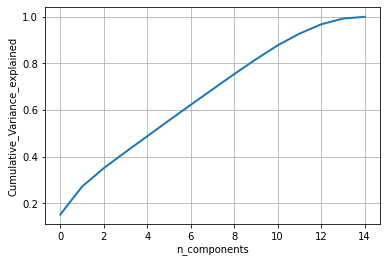

In [58]:

pca=PCA()  
pca.n_components=15
pca_data=pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()


In [59]:
pca=PCA()  
pca.n_components=15
pca_data=pca.fit_transform(X_train)  
# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))


if n_components= 0,   variance=15.260000
if n_components= 1,   variance=27.240000
if n_components= 2,   variance=35.140000
if n_components= 3,   variance=42.060000
if n_components= 4,   variance=48.850000
if n_components= 5,   variance=55.600000
if n_components= 6,   variance=62.290000
if n_components= 7,   variance=68.900000
if n_components= 8,   variance=75.460000
if n_components= 9,   variance=81.820000
if n_components= 10,   variance=87.790000
if n_components= 11,   variance=92.800000
if n_components= 12,   variance=96.800000
if n_components= 13,   variance=99.250000
if n_components= 14,   variance=100.000000


In [60]:

pca=PCA(.90)  
pca.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)


Number of components to explain 90% Variance is 12


In [61]:
pca=PCA(n_components=2) 
pca_data_vis=pca.fit_transform(X_train) 
print('shape of PCA data',pca_data_vis.shape)


shape of PCA data (18621, 2)


C:\Users\hades\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


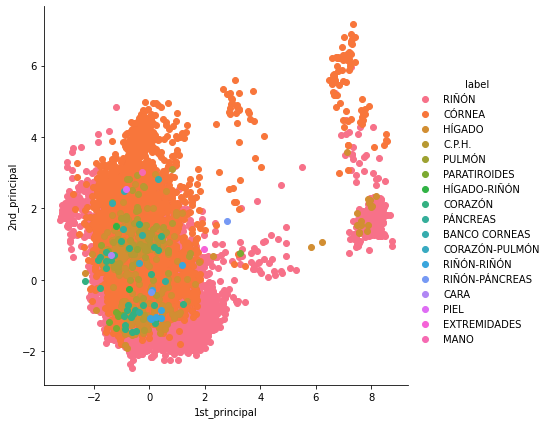

In [62]:

pca_data_vis = np.vstack((pca_data_vis.T,y_train)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("1st_principal","2nd_principal","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [63]:

pca=PCA(.90) 
pca.fit(X_train) 
X_train=pca.transform(X_train) 
X_test=pca.transform(X_test)
from sklearn.linear_model  import LogisticRegression  
LogReg=LogisticRegression(class_weight='balanced')  
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)


C:\Users\hades\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hades\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [64]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
print('Accuracy:',accuracy_score(y_test,y_pred))  
print('F1 score:',f1_score(y_test,y_pred,average='weighted'))   
print('Recall:',recall_score(y_test,y_pred,average='weighted'))   
print('Precision:',precision_score(y_test,y_pred,average='weighted'))  
print('\n clasification report:\n',classification_report(y_test,y_pred))  
print('\n confussion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.7577319587628866
F1 score: 0.8134765735956694
Recall: 0.7577319587628866
Precision:

C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


 0.8809290612206516

 clasification report:
                 precision    recall  f1-score   support

 BANCO CORNEAS       0.00      0.00      0.00         0
        C.P.H.       0.34      0.88      0.49        17
          CARA       0.00      0.00      0.00         0
       CORAZÓN       0.02      0.08      0.03        13
CORAZÓN-PULMÓN       0.00      0.00      0.00         0
        CÓRNEA       0.79      0.62      0.70      1128
  EXTREMIDADES       0.00      0.00      0.00         0
        HÍGADO       0.01      0.02      0.01        52
  HÍGADO-RIÑÓN       0.00      0.00      0.00         0
          MANO       0.00      0.00      0.00         0
  PARATIROIDES       0.27      1.00      0.42         4
          PIEL       0.00      0.00      0.00         0
        PULMÓN       0.00      0.00      0.00         0
      PÁNCREAS       0.00      0.00      0.00         1
         RIÑÓN       0.93      0.81      0.87      3441
RIÑÓN-PÁNCREAS       0.00      0.00      0.00         0
  

C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
